# Importing the Libraries

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Datasets

In [243]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 6284-993D

 Directory of C:\Users\praav\Documents\Machine Learning Class Notes By Me

27-05-2024  23:33    <DIR>          .
16-05-2024  12:28    <DIR>          ..
16-05-2024  12:35    <DIR>          .ipynb_checkpoints
27-05-2024  23:33           918,058 Linear Regression Using Loan Data.ipynb
27-05-2024  23:28               880 linear_reg_loan_predictor.pkl
16-05-2024  12:26            34,347 loan_data_test.csv
16-05-2024  12:26           270,598 loan_data_train.csv
               4 File(s)      1,223,883 bytes
               3 Dir(s)  242,790,227,968 bytes free


In [244]:
### Some of the company will provide both train and test dataset's. In my case I have both Train and Test dataset's

train = pd.read_csv('loan_data_train.csv')
train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [245]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2199 non-null   object 
 2   Amount.Funded.By.Investors      2199 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2196 non-null   object 
 12  Revolving.CREDIT.Balance        21

In [246]:
test = pd.read_csv('loan_data_test.csv')
train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [247]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              300 non-null    int64  
 1   Amount.Requested                300 non-null    int64  
 2   Amount.Funded.By.Investors      300 non-null    object 
 3   Loan.Length                     300 non-null    object 
 4   Loan.Purpose                    300 non-null    object 
 5   Debt.To.Income.Ratio            300 non-null    object 
 6   State                           300 non-null    object 
 7   Home.Ownership                  300 non-null    object 
 8   Monthly.Income                  300 non-null    float64
 9   FICO.Range                      300 non-null    object 
 10  Open.CREDIT.Lines               300 non-null    object 
 11  Revolving.CREDIT.Balance        300 non-null    int64  
 12  Inquiries.in.the.Last.6.Months  300 

# Data Dictionary

In [248]:
# It is nothing but metadata = Data about the data -- Discription about the data
# - It has the description about the full data



# Problem Statement

In [249]:
# - What is the objective of the modelling
# - Predict the Interest rate (Interset Rate is the Target column -- Label)

# Sanity Check

In [250]:
# Whether I have sufficient data or not or how much training data I have - - so in our case there are nearly 2000 rows.. (Sufficient data)

In [251]:
train.shape,test.shape #Sufficient data

((2200, 15), (300, 14))

In [252]:
# trainig data= features+target
# test data=features
# Here target is our interest column

In [253]:
# Sanity Check -> EDA -> Preprocessing -> Modeling -> Validation

In [254]:
# Logical Relationship

# ID- False (We can drop ID column) -- No relations to interest column
# State- False (We can drop the State column) -- No relations to interest column
# Loan Purpose - Maybe (Talk to the SME) -- need to talk with subject mentor
# FICO Score- Risk Indicator (Important)- Take the mean of the range and convert to numeric
# Open Credit Lines- Important

# Missing Vlaues

In [255]:
train.isna().sum()

ID                                 1
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 69
dtype: int64

In [256]:
# We have some missing values

In [257]:
# Identify the non_numeric columns

In [258]:
train.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [259]:
# Amount Requested- Convert into numeric
# Amount Fuunded- Convert into numeric
# Interest Rate- Remove the % sign and Convert into numeric
# Loan Length- Categorical column
# Loan Purpose- Object
# Debt to Income Ratio- Remove % sign and convert to numeric
# Home ownership- Object
# FICO- Risk Indicator (Important)- Take the mean of the range and convert to numeric
# Open Credit lines- Convert to Numeric (continuous/category)
# Revolving credit scores- Convert to Numeric
# Employment Length- Categorical column
# Inquiries in the Last 6 Months- Doesn't seem to have any impact on target column so drop it
# Employment Length- Categorical

In [260]:
# Loan duration- 3 yrs, 5 yrs, 10 yrs and 20 yrs

In [261]:
float('12.5')

12.5

# Preprocessing

In [262]:
# Drop the ID,Inquiries in the Last 6 Months and State column

In [263]:
# First combine the train and test data and then preprocess.
# Before modeling we will again split the dataset into train and test and will train the model on traininig data only

In [264]:
train.shape,test.shape

((2200, 15), (300, 14))

In [265]:
test.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years


In [266]:
train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [267]:
# Now we changing the column . to _ for my clarrification

train.columns=train.columns.str.replace('.','_')

In [268]:
# In Below column we can able to see . is replaced by _

train.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [269]:
# Now the same method need to do for test column

test.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years


In [270]:
test.columns=test.columns.str.replace('.','_')

In [271]:
test.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years


In [272]:
# We are creating the interest_rate column for matching both train and test

test['Interest_Rate']=np.nan

In [273]:
test.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Interest_Rate
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year,NaN
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years,NaN
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years,NaN
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years,NaN
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years,NaN


In [274]:
train.shape

(2200, 15)

In [275]:
test.shape

(300, 15)

In [276]:
#Now we have both target column same

In [277]:
#creating two extra two colum in train and test

train['Data_Type']='Train'
test['Data_Type']='Test'

In [278]:
train.shape,test.shape

((2200, 16), (300, 16))

In [279]:
# 14 features + 1 target + 1 placeholder

In [280]:
train.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_Type
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,Train
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,Train
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,Train
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,Train
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,Train


In [281]:
test.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Interest_Rate,Data_Type
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year,NaN,Test
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years,NaN,Test
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years,NaN,Test
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years,NaN,Test
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years,NaN,Test


# Combining the train and test data

In [282]:
df = pd.concat((train,test),ignore_index=True)
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_Type
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,Train
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,Train
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,Train
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,Train
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,Train


# Converting the non-numeric column to numeric
# Amount Requested and Amount Funded -> Numeric

In [283]:
df.columns

Index(['ID', 'Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length', 'Data_Type'],
      dtype='object')

In [284]:
for i in ['Amount_Requested','Amount_Funded_By_Investors']:
    df[i]=pd.to_numeric(df[i],errors='coerce')

In [285]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_Type                          object
dtype: object

# Interest Rate and Debt to Income ratio- Numeric

In [286]:
for i in ['Interest_Rate','Debt_To_Income_Ratio']:
    df[i]=df[i].str.replace('%','').astype(float)

In [287]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_Type                          object
dtype: object

# Loan Length

In [288]:
df.Loan_Length.value_counts()

Loan_Length
36 months    1950
60 months     548
.               1
Name: count, dtype: int64

In [289]:
#inpace = True means we are no need to create new formate going with original data format
# One Hot Encoding or Label Encoding

In [290]:
df.Loan_Length.replace('.','36 months',inplace=True)

In [291]:
df.Loan_Length.value_counts()

Loan_Length
36 months    1951
60 months     548
Name: count, dtype: int64

In [292]:
df.Loan_Length.value_counts(dropna=False)

Loan_Length
36 months    1951
60 months     548
NaN             1
Name: count, dtype: int64

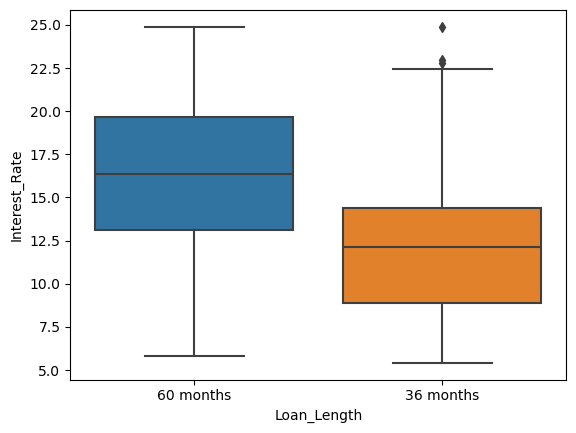

In [293]:
sns.boxplot(x=df[df.Data_Type=='Train']['Loan_Length'],y=df[df.Data_Type=='Train']['Interest_Rate'])
plt.show()

In [294]:
# We should go for Label Encoding
# 36 Months- 0
# 60 Months- 1

In [295]:
df.Loan_Length=df.Loan_Length.apply(lambda x:0 if x=='36 months' else 1)

In [296]:
# Here the null value is greater  that 36 months so it setted to 1 
df.Loan_Length.value_counts(dropna=False)

Loan_Length
0    1951
1     549
Name: count, dtype: int64

In [297]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_Type                          object
dtype: object

In [298]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_Type
0,79542.0,25000.0,25000.00,18.49,1,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,Train
1,75473.0,19750.0,19750.00,17.27,1,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,Train
2,67265.0,2100.0,2100.00,14.33,0,major_purchase,3.50,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,Train
3,80167.0,28000.0,28000.00,16.29,0,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,Train
4,17240.0,24250.0,17431.82,12.23,1,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,Train


# Loan Puropse

In [299]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_Type                          object
dtype: object

In [300]:
df.Loan_Purpose.value_counts()

Loan_Purpose
debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: count, dtype: int64

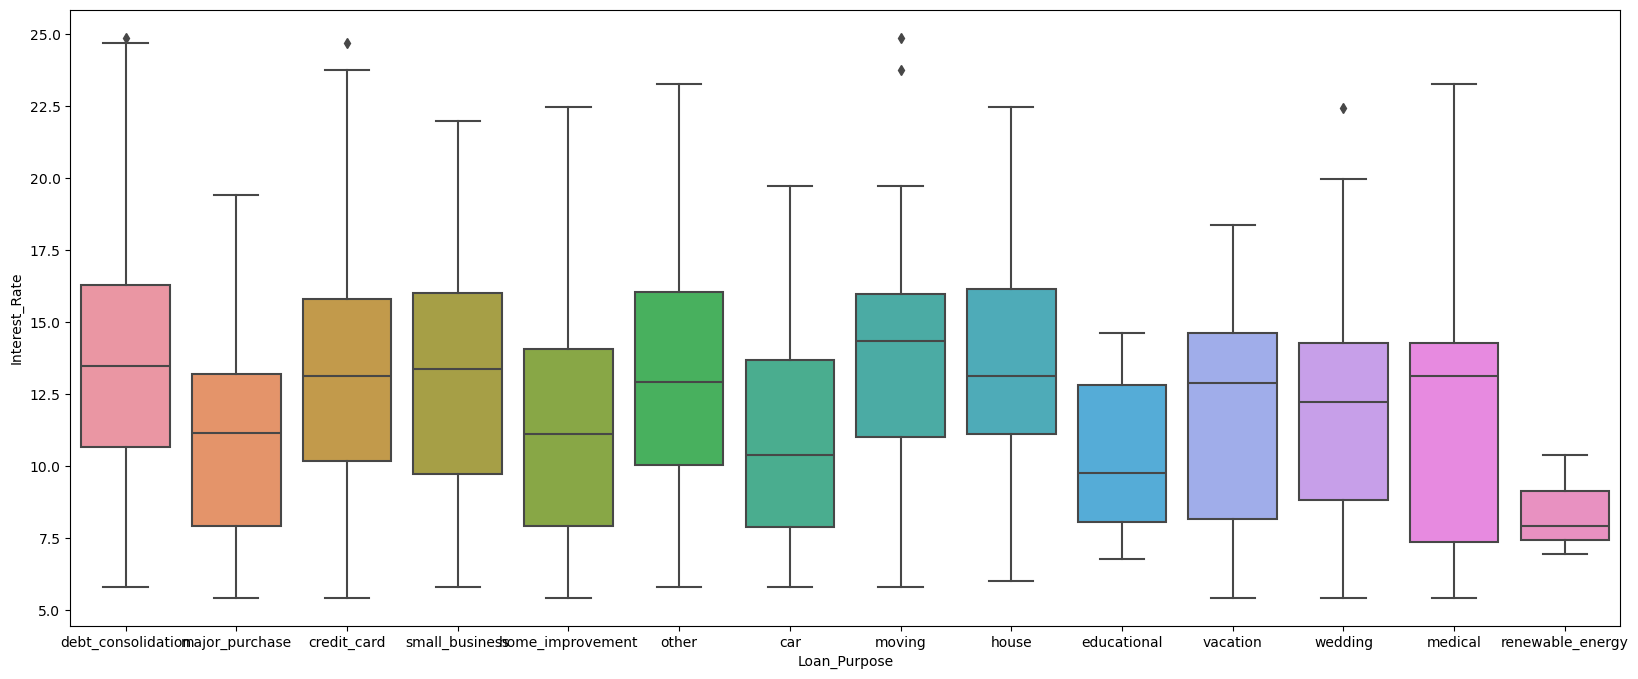

In [301]:
plt.figure(figsize=(20,8))
sns.boxplot(x=df[df.Data_Type=='Train']['Loan_Purpose'],y=df[df.Data_Type=='Train']['Interest_Rate'],order=None)
plt.show()

In [302]:
# Education- 5-15
# Debt- 5-25

In [303]:
df[df.Data_Type=='Train']['Loan_Purpose'].unique()

array(['debt_consolidation', 'major_purchase', 'credit_card',
       'small_business', 'home_improvement', 'other', 'car', 'moving',
       'house', 'educational', 'vacation', 'wedding', 'medical', nan,
       'renewable_energy'], dtype=object)

# Target guided label encoding

In [304]:
cols=list(df[df.Data_Type=='Train'].groupby('Loan_Purpose').Interest_Rate.var().sort_values().index)
cols

['renewable_energy',
 'educational',
 'major_purchase',
 'car',
 'wedding',
 'vacation',
 'credit_card',
 'debt_consolidation',
 'home_improvement',
 'other',
 'small_business',
 'medical',
 'house',
 'moving']

In [305]:
d={}
for i in range(1, len(cols)):
    d[cols[i]]=i
print(d)

{'educational': 1, 'major_purchase': 2, 'car': 3, 'wedding': 4, 'vacation': 5, 'credit_card': 6, 'debt_consolidation': 7, 'home_improvement': 8, 'other': 9, 'small_business': 10, 'medical': 11, 'house': 12, 'moving': 13}


In [306]:
df.Loan_Purpose.replace(d,inplace=True)

In [307]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_Type
0,79542.0,25000.0,25000.00,18.49,1,7,27.56,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,Train
1,75473.0,19750.0,19750.00,17.27,1,7,13.39,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,Train
2,67265.0,2100.0,2100.00,14.33,0,2,3.50,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,Train
3,80167.0,28000.0,28000.00,16.29,0,6,19.62,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,Train
4,17240.0,24250.0,17431.82,12.23,1,6,23.79,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,Train


In [308]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_Type                          object
dtype: object

# Home Ownership

In [309]:
df[df.Data_Type=='Train']['Home_Ownership'].value_counts()

Home_Ownership
MORTGAGE    1018
RENT         999
OWN          177
OTHER          4
NONE           1
Name: count, dtype: int64

<Axes: xlabel='Home_Ownership', ylabel='Interest_Rate'>

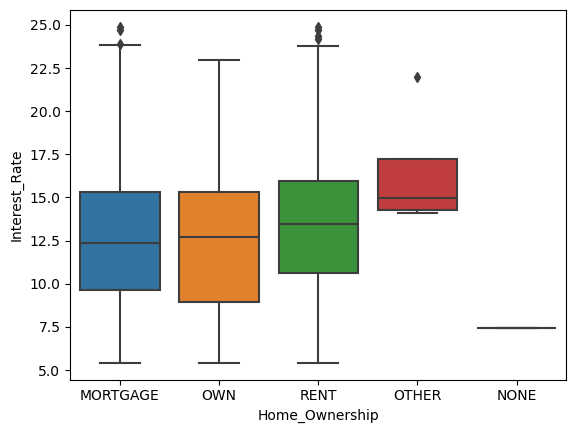

In [310]:
sns.boxplot(x=df[df.Data_Type=='Train']['Home_Ownership'],y=df[df.Data_Type=='Train']['Interest_Rate'])

In [311]:
# Grouping the None and Other to Rent

df.Home_Ownership.replace({'OTHER':'RENT', 'NONE':'RENT'},inplace=True)

In [312]:
df.Home_Ownership.head()

0    MORTGAGE
1    MORTGAGE
2         OWN
3    MORTGAGE
4    MORTGAGE
Name: Home_Ownership, dtype: object

In [313]:
df.Home_Ownership.value_counts()

Home_Ownership
RENT        1152
MORTGAGE    1147
OWN          200
Name: count, dtype: int64

# One Hot Encoding in Home Ownership

In [314]:
# Here now one hot encoding to the home_ownership colums and giving prefix name as H bcoz we can't able to give full name

df=pd.get_dummies(df,columns=['Home_Ownership'],prefix='H')
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_Type,H_MORTGAGE,H_OWN,H_RENT
0,79542.0,25000.0,25000.00,18.49,1,7,27.56,VA,8606.56,720-724,11,15210,3.0,5 years,Train,True,False,False
1,75473.0,19750.0,19750.00,17.27,1,7,13.39,NY,6737.50,710-714,14,19070,3.0,4 years,Train,True,False,False
2,67265.0,2100.0,2100.00,14.33,0,2,3.50,LA,1000.00,690-694,13,893,1.0,< 1 year,Train,False,True,False
3,80167.0,28000.0,28000.00,16.29,0,6,19.62,NV,7083.33,710-714,12,38194,1.0,10+ years,Train,True,False,False
4,17240.0,24250.0,17431.82,12.23,1,6,23.79,OH,5833.33,730-734,6,31061,2.0,10+ years,Train,True,False,False


# Fico Range

In [315]:
# - Take the average of the range and convert to numeric

In [316]:
df.FICO_Range.head().value_counts()

FICO_Range
710-714    2
720-724    1
690-694    1
730-734    1
Name: count, dtype: int64

In [317]:
fico=df.FICO_Range.str.split('-',expand=True)
fico.columns=['Min','Max']
fico=fico.astype(int)
fico.dtypes

Min    int32
Max    int32
dtype: object

In [318]:
df.FICO_Range.head().value_counts()

FICO_Range
710-714    2
720-724    1
690-694    1
730-734    1
Name: count, dtype: int64

In [319]:
df.FICO_Range=(fico.Min+fico.Max)/2

In [320]:
'720-724'
(720+724)/2

722.0

In [321]:
'720-724'.split('-')

['720', '724']

In [322]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_Type                          object
H_MORTGAGE                           bool
H_OWN                                bool
H_RENT                               bool
dtype: object

In [323]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_Type,H_MORTGAGE,H_OWN,H_RENT
0,79542.0,25000.0,25000.00,18.49,1,7,27.56,VA,8606.56,722.0,11,15210,3.0,5 years,Train,True,False,False
1,75473.0,19750.0,19750.00,17.27,1,7,13.39,NY,6737.50,712.0,14,19070,3.0,4 years,Train,True,False,False
2,67265.0,2100.0,2100.00,14.33,0,2,3.50,LA,1000.00,692.0,13,893,1.0,< 1 year,Train,False,True,False
3,80167.0,28000.0,28000.00,16.29,0,6,19.62,NV,7083.33,712.0,12,38194,1.0,10+ years,Train,True,False,False
4,17240.0,24250.0,17431.82,12.23,1,6,23.79,OH,5833.33,732.0,6,31061,2.0,10+ years,Train,True,False,False


# Open Credit Lines

In [324]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_Type                          object
H_MORTGAGE                           bool
H_OWN                                bool
H_RENT                               bool
dtype: object

In [325]:
df.Open_CREDIT_Lines.unique()

array(['11', '14', '13', '12', '6', '2', '5', '24', '7', '10', '8', '4',
       '15', '17', '18', '9', '20', '16', '3', '.', '19', '23', nan, '21',
       '26', '22', '25', '31', '34', '38', '36'], dtype=object)

In [326]:
df.Open_CREDIT_Lines=pd.to_numeric(df.Open_CREDIT_Lines,errors='coerce')

In [327]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_Type                          object
H_MORTGAGE                           bool
H_OWN                                bool
H_RENT                               bool
dtype: object

# Revolving_CREDIT_Balance --> to numeric

In [328]:
df.Revolving_CREDIT_Balance=pd.to_numeric(df.Revolving_CREDIT_Balance,errors='coerce')

In [329]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_Type                          object
H_MORTGAGE                           bool
H_OWN                                bool
H_RENT                               bool
dtype: object

# Employment_Length

In [330]:
df.Employment_Length.value_counts()

Employment_Length
10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: count, dtype: int64

In [331]:
# .5,1,2......10
# <1->.5
# . -> 10+years
# Remove- years, +, < space

In [332]:
df.Employment_Length.head()

0      5 years
1      4 years
2     < 1 year
3    10+ years
4    10+ years
Name: Employment_Length, dtype: object

In [333]:
df[df.Employment_Length=='.']

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_Type,H_MORTGAGE,H_OWN,H_RENT
559,33181.0,8000.0,8000.0,12.69,0,7,17.10,SC,7083.0,697.0,11.0,9345.0,3.0,.,Train,True,False,False
2447,17977.0,5200.0,5175.0,NaN,1,7,10.29,AL,3750.0,762.0,10.0,16094.0,0.0,.,Test,True,False,False


In [334]:
df.Employment_Length.replace({'.':'10+ years','< 1 year':0.5},inplace=True)

In [335]:
df.Employment_Length.value_counts()

Employment_Length
10+ years    655
0.5          249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
Name: count, dtype: int64

In [336]:
df.Employment_Length.replace(r'[years +]','',regex=True,inplace=True)

In [337]:
df.Employment_Length.value_counts(dropna=False)

Employment_Length
10     655
0.5    249
2      243
3      235
5      202
4      191
1      177
6      163
7      127
8      108
NaN     78
9       72
Name: count, dtype: int64

In [338]:
df.Employment_Length=pd.to_numeric(df.Employment_Length,errors='coerce')

In [339]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                 float64
Data_Type                          object
H_MORTGAGE                           bool
H_OWN                                bool
H_RENT                               bool
dtype: object

# Remove State And ID columns

In [340]:
df.drop(columns=['ID','State'], inplace=True)

In [341]:
df.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_Type,H_MORTGAGE,H_OWN,H_RENT
0,25000.0,25000.00,18.49,1,7,27.56,8606.56,722.0,11.0,15210.0,3.0,5.0,Train,True,False,False
1,19750.0,19750.00,17.27,1,7,13.39,6737.50,712.0,14.0,19070.0,3.0,4.0,Train,True,False,False
2,2100.0,2100.00,14.33,0,2,3.50,1000.00,692.0,13.0,893.0,1.0,0.5,Train,False,True,False
3,28000.0,28000.00,16.29,0,6,19.62,7083.33,712.0,12.0,38194.0,1.0,10.0,Train,True,False,False
4,24250.0,17431.82,12.23,1,6,23.79,5833.33,732.0,6.0,31061.0,2.0,10.0,Train,True,False,False


In [342]:
df.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                 float64
Data_Type                          object
H_MORTGAGE                           bool
H_OWN                                bool
H_RENT                               bool
dtype: object

In [343]:
df.drop(columns=['Inquiries_in_the_Last_6_Months'],inplace=True)

In [344]:
df.dtypes

Amount_Requested              float64
Amount_Funded_By_Investors    float64
Interest_Rate                 float64
Loan_Length                     int64
Loan_Purpose                   object
Debt_To_Income_Ratio          float64
Monthly_Income                float64
FICO_Range                    float64
Open_CREDIT_Lines             float64
Revolving_CREDIT_Balance      float64
Employment_Length             float64
Data_Type                      object
H_MORTGAGE                       bool
H_OWN                            bool
H_RENT                           bool
dtype: object

# Null Value Imputtation

In [345]:
df.isna().sum()

Amount_Requested                5
Amount_Funded_By_Investors      5
Interest_Rate                 300
Loan_Length                     0
Loan_Purpose                    1
Debt_To_Income_Ratio            1
Monthly_Income                  3
FICO_Range                      0
Open_CREDIT_Lines               9
Revolving_CREDIT_Balance        5
Employment_Length              78
Data_Type                       0
H_MORTGAGE                      0
H_OWN                           0
H_RENT                          0
dtype: int64

In [346]:
# Numeric Continuous - mean
# Categorail - mode

In [347]:
df.nunique()

Amount_Requested               380
Amount_Funded_By_Investors     709
Interest_Rate                  265
Loan_Length                      2
Loan_Purpose                    14
Debt_To_Income_Ratio          1669
Monthly_Income                 631
FICO_Range                      38
Open_CREDIT_Lines               29
Revolving_CREDIT_Balance      2348
Employment_Length               11
Data_Type                        2
H_MORTGAGE                       2
H_OWN                            2
H_RENT                           2
dtype: int64

In [348]:
num_cols=['Amount_Requested','Amount_Funded_By_Investors','Debt_To_Income_Ratio','Revolving_CREDIT_Balance','Monthly_Income']

In [349]:
def mis_nums(data):
    df[data].fillna(df[data].mean(),inplace=True)

In [350]:
for i in num_cols:
    mis_nums(i)

In [351]:
df.isna().sum()

Amount_Requested                0
Amount_Funded_By_Investors      0
Interest_Rate                 300
Loan_Length                     0
Loan_Purpose                    1
Debt_To_Income_Ratio            0
Monthly_Income                  0
FICO_Range                      0
Open_CREDIT_Lines               9
Revolving_CREDIT_Balance        0
Employment_Length              78
Data_Type                       0
H_MORTGAGE                      0
H_OWN                           0
H_RENT                          0
dtype: int64

In [352]:
cat_cols=['Loan_Purpose','Employment_Length','Open_CREDIT_Lines']

In [353]:
def mis_cat(data):
    df[data].fillna(df[data].mode()[0],inplace=True)

In [354]:
for i in cat_cols:
    mis_cat(i)

In [355]:
df.isna().sum()

Amount_Requested                0
Amount_Funded_By_Investors      0
Interest_Rate                 300
Loan_Length                     0
Loan_Purpose                    0
Debt_To_Income_Ratio            0
Monthly_Income                  0
FICO_Range                      0
Open_CREDIT_Lines               0
Revolving_CREDIT_Balance        0
Employment_Length               0
Data_Type                       0
H_MORTGAGE                      0
H_OWN                           0
H_RENT                          0
dtype: int64

In [356]:
df.dtypes

Amount_Requested              float64
Amount_Funded_By_Investors    float64
Interest_Rate                 float64
Loan_Length                     int64
Loan_Purpose                   object
Debt_To_Income_Ratio          float64
Monthly_Income                float64
FICO_Range                    float64
Open_CREDIT_Lines             float64
Revolving_CREDIT_Balance      float64
Employment_Length             float64
Data_Type                      object
H_MORTGAGE                       bool
H_OWN                            bool
H_RENT                           bool
dtype: object

In [357]:
# df.Loan_Purpose.astype(int)

In [358]:
df[df.Loan_Purpose=='renewable_energy']

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,Data_Type,H_MORTGAGE,H_OWN,H_RENT
734,4700.0,4700.0,7.90,0,renewable_energy,10.65,3416.67,762.0,3.0,2297.0,10.0,Train,False,False,True
788,1000.0,750.0,10.36,0,renewable_energy,0.00,1800.00,732.0,2.0,0.0,0.5,Train,True,False,False
1211,8400.0,8400.0,6.92,0,renewable_energy,13.30,3000.00,747.0,9.0,6998.0,1.0,Train,False,False,True
2233,4000.0,4000.0,NaN,0,renewable_energy,22.74,1666.67,667.0,7.0,278.0,3.0,Test,False,False,True


In [359]:
df.Loan_Purpose.value_counts()

Loan_Purpose
7                   1308
6                    444
9                    200
8                    152
2                    101
10                    87
3                     50
4                     39
11                    30
13                    29
5                     21
12                    20
1                     15
renewable_energy       4
Name: count, dtype: int64

In [360]:
df.Loan_Purpose.replace('renewable_energy',1,inplace=True)

In [361]:
df.Loan_Purpose.value_counts()

Loan_Purpose
7     1308
6      444
9      200
8      152
2      101
10      87
3       50
4       39
11      30
13      29
5       21
12      20
1       19
Name: count, dtype: int64

In [362]:
df.Loan_Purpose=df.Loan_Purpose.astype(int)

In [363]:
df.dtypes

Amount_Requested              float64
Amount_Funded_By_Investors    float64
Interest_Rate                 float64
Loan_Length                     int64
Loan_Purpose                    int32
Debt_To_Income_Ratio          float64
Monthly_Income                float64
FICO_Range                    float64
Open_CREDIT_Lines             float64
Revolving_CREDIT_Balance      float64
Employment_Length             float64
Data_Type                      object
H_MORTGAGE                       bool
H_OWN                            bool
H_RENT                           bool
dtype: object

# Outliers

In [364]:
# Numeric continuous columns

In [365]:
out_cols=['Amount_Requested','Amount_Funded_By_Investors','Debt_To_Income_Ratio','Revolving_CREDIT_Balance','Monthly_Income']

In [366]:
# Visual Representation

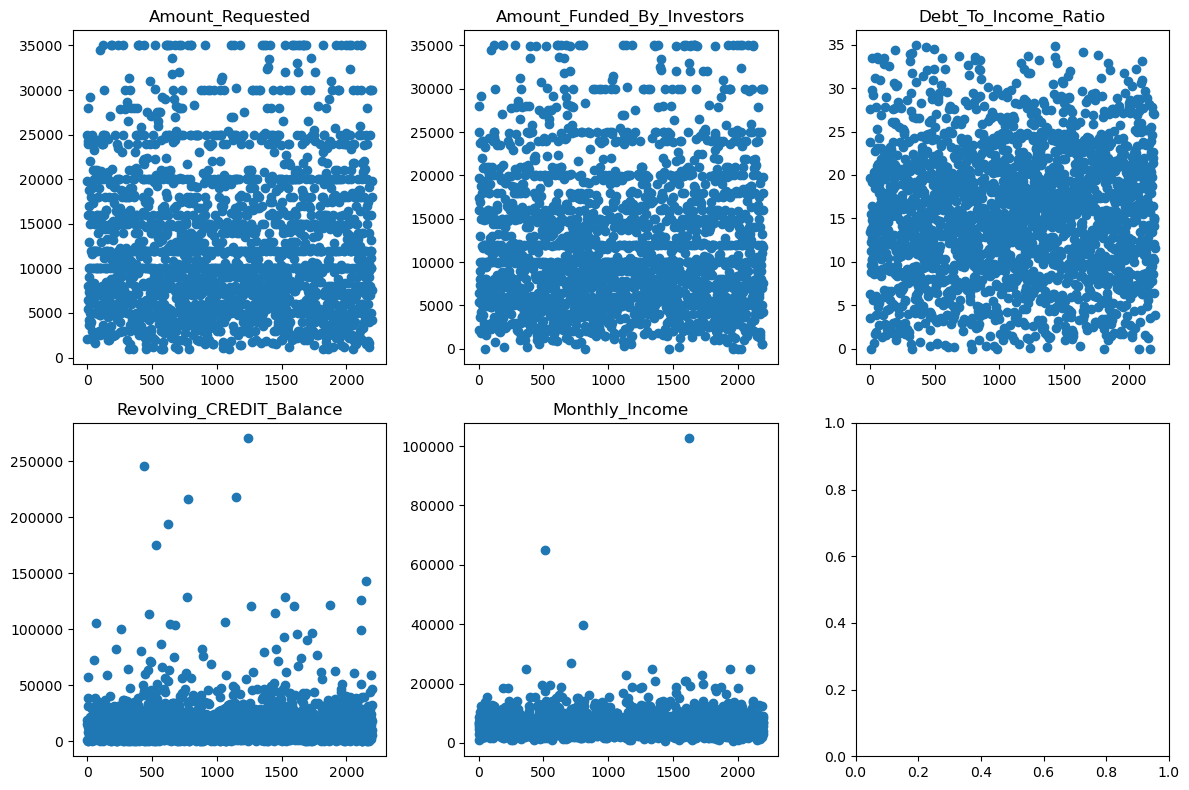

In [367]:
f,ax=plt.subplots(2,3,figsize=(12,8),dpi=100)
col_index=0
try:
    for i in range(2):
        for j in range(3):
            ax[i,j].scatter(y=df[df.Data_Type=='Train'][out_cols[col_index]],x=df[df.Data_Type=='Train'][out_cols[col_index]].index)
            ax[i,j].set_title(out_cols[col_index])
            col_index+=1
except:
    pass
plt.tight_layout()
plt.show()

In [368]:
out_cols

['Amount_Requested',
 'Amount_Funded_By_Investors',
 'Debt_To_Income_Ratio',
 'Revolving_CREDIT_Balance',
 'Monthly_Income']

In [369]:
col_index=0
out_cols[col_index]

'Amount_Requested'

In [370]:
df[df.Data_Type=='Train'][out_cols[col_index]].index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199],
      dtype='int64', length=2200)

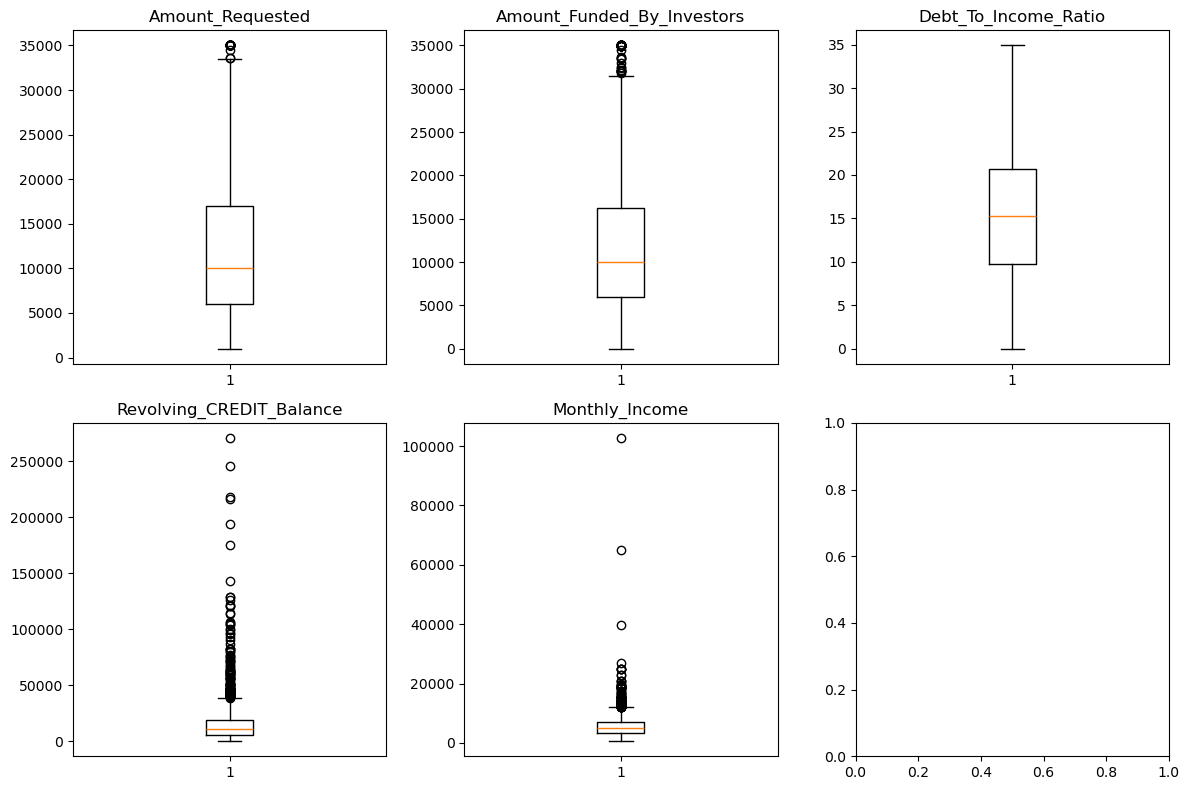

In [371]:
f,ax=plt.subplots(2,3,figsize=(12,8),dpi=100)
col_index=0
try:
    for i in range(2):
        for j in range(3):
            ax[i,j].boxplot(df[df.Data_Type=='Train'][out_cols[col_index]])
            ax[i,j].set_title(out_cols[col_index])
            col_index+=1
except:
    pass
plt.tight_layout()
plt.show()

In [372]:
df.Loan_Length.mode()[0]

0

# Treating Outliers

In [373]:
# Revolving Credit Balance and Monthly income have ouliers
# Revolving Credit Balance- >150000 is an outlier
# Monthly income- >25000 is an outlier

In [374]:
# Either we can drop the rows that have outliers or we can cap

In [375]:
rows=train[df[df.Data_Type=='Train']['Revolving_CREDIT_Balance']>150000].index
rows

Index([435, 532, 621, 777, 1152, 1244], dtype='int64')

In [376]:
# df.drop(rows,axis=0)

In [377]:
# Cap the values upto 150000

In [378]:
df.Revolving_CREDIT_Balance=np.where(df.Revolving_CREDIT_Balance>150000,150000,df.Revolving_CREDIT_Balance)

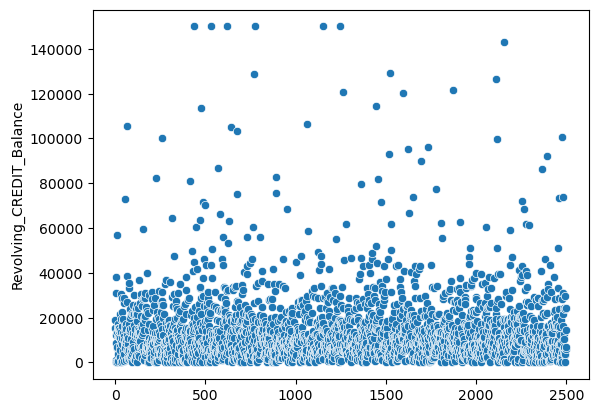

In [379]:
sns.scatterplot(y=df.Revolving_CREDIT_Balance,x=df.Revolving_CREDIT_Balance.index)
plt.show()

In [380]:
# Monthly Income cap the value upto 25000

df.Monthly_Income=np.where(df.Monthly_Income>25000,25000,df.Monthly_Income)

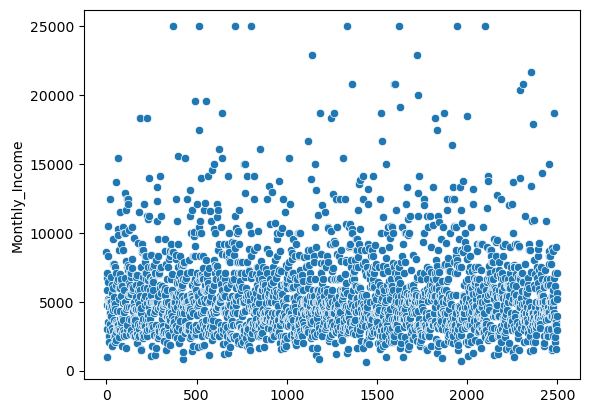

In [381]:
sns.scatterplot(y=df.Monthly_Income,x=df.Monthly_Income.index)
plt.show()

In [382]:
df.dtypes

Amount_Requested              float64
Amount_Funded_By_Investors    float64
Interest_Rate                 float64
Loan_Length                     int64
Loan_Purpose                    int32
Debt_To_Income_Ratio          float64
Monthly_Income                float64
FICO_Range                    float64
Open_CREDIT_Lines             float64
Revolving_CREDIT_Balance      float64
Employment_Length             float64
Data_Type                      object
H_MORTGAGE                       bool
H_OWN                            bool
H_RENT                           bool
dtype: object

In [383]:
# - 1- Cap the values on the basis of visual representation
# - 2- Cap the values between 1st and 99th percentile values- Blanket Method
# - 3- IQR method (Widely used)

In [384]:
upper=df[df.Data_Type=='Train'].Revolving_CREDIT_Balance.quantile(.99)
upper

95442.33999999982

In [385]:
rows=train[df[df.Data_Type=='Train']['Revolving_CREDIT_Balance']>upper]
rows.shape

(22, 16)

In [386]:
# Need to cap the revolving credit balance

In [387]:
q3=df[df.Data_Type=='Train'].Revolving_CREDIT_Balance.quantile(.75)
q1=df[df.Data_Type=='Train'].Revolving_CREDIT_Balance.quantile(.25)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr

In [388]:
rows=train[df[df.Data_Type=='Train']['Revolving_CREDIT_Balance']>upper]
rows.shape

(124, 16)

In [389]:
lower

-14207.625

# Coorelation

In [390]:
# Out of 10000 rows, 1500 capped

In [391]:
# 2000 rows
# 10000 rows 
# 25000 rows

In [392]:
# Drop the Amount Funded by Investors 

In [393]:
df.drop('Amount_Funded_By_Investors',axis=1,inplace=True)

In [394]:
df.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,Data_Type,H_MORTGAGE,H_OWN,H_RENT
0,25000.0,18.49,1,7,27.56,8606.56,722.0,11.0,15210.0,5.0,Train,True,False,False
1,19750.0,17.27,1,7,13.39,6737.50,712.0,14.0,19070.0,4.0,Train,True,False,False
2,2100.0,14.33,0,2,3.50,1000.00,692.0,13.0,893.0,0.5,Train,False,True,False
3,28000.0,16.29,0,6,19.62,7083.33,712.0,12.0,38194.0,10.0,Train,True,False,False
4,24250.0,12.23,1,6,23.79,5833.33,732.0,6.0,31061.0,10.0,Train,True,False,False


In [395]:
# Preprocessing is done
# Now is the time to split the data into train and test as before

In [396]:
train_data=df[df.Data_Type=='Train']
train_data.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,Data_Type,H_MORTGAGE,H_OWN,H_RENT
0,25000.0,18.49,1,7,27.56,8606.56,722.0,11.0,15210.0,5.0,Train,True,False,False
1,19750.0,17.27,1,7,13.39,6737.50,712.0,14.0,19070.0,4.0,Train,True,False,False
2,2100.0,14.33,0,2,3.50,1000.00,692.0,13.0,893.0,0.5,Train,False,True,False
3,28000.0,16.29,0,6,19.62,7083.33,712.0,12.0,38194.0,10.0,Train,True,False,False
4,24250.0,12.23,1,6,23.79,5833.33,732.0,6.0,31061.0,10.0,Train,True,False,False


In [397]:
train_data.shape

(2200, 14)

In [398]:
test_data=df[df.Data_Type=='Test']
test_data.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,Data_Type,H_MORTGAGE,H_OWN,H_RENT
2200,5000.0,NaN,1,13,12.59,4416.67,692.0,13.0,7686.0,0.5,Test,False,False,True
2201,18000.0,NaN,1,7,4.93,5258.50,712.0,6.0,11596.0,10.0,Test,False,False,True
2202,7200.0,NaN,1,7,25.16,3750.00,752.0,13.0,7283.0,6.0,Test,True,False,False
2203,7200.0,NaN,0,7,17.27,3416.67,792.0,14.0,4838.0,10.0,Test,True,False,False
2204,22000.0,NaN,1,7,18.28,6083.33,722.0,9.0,20181.0,8.0,Test,True,False,False


In [399]:
test_data.shape

(300, 14)

In [400]:
train_data.drop('Data_Type',axis=1,inplace=True)

In [401]:
test_data.drop('Data_Type',axis=1,inplace=True)

In [402]:
train_data.shape,test_data.shape

((2200, 13), (300, 13))

In [403]:
test_data.drop('Interest_Rate',axis=1,inplace=True)

In [404]:
test_data.shape

(300, 12)

In [405]:
train_data.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,H_MORTGAGE,H_OWN,H_RENT
0,25000.0,18.49,1,7,27.56,8606.56,722.0,11.0,15210.0,5.0,True,False,False
1,19750.0,17.27,1,7,13.39,6737.50,712.0,14.0,19070.0,4.0,True,False,False
2,2100.0,14.33,0,2,3.50,1000.00,692.0,13.0,893.0,0.5,False,True,False
3,28000.0,16.29,0,6,19.62,7083.33,712.0,12.0,38194.0,10.0,True,False,False
4,24250.0,12.23,1,6,23.79,5833.33,732.0,6.0,31061.0,10.0,True,False,False


In [406]:
# The train_data again we have split into train and validation data (80-20 ratio) 

In [407]:
from sklearn.model_selection import train_test_split

In [408]:
# train_test_split(train_data,train_size,random_state)

In [409]:
new_train_data,val_data=train_test_split(train_data,train_size=.80,random_state=120)

In [410]:
new_train_data.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,H_MORTGAGE,H_OWN,H_RENT
1873,24250.0,12.53,0,8,12.70,18750.00,727.0,10.0,121563.0,10.0,False,True,False
1198,12000.0,11.58,0,10,11.07,3333.33,717.0,7.0,17495.0,1.0,False,False,True
755,12000.0,10.16,0,7,28.01,2916.67,712.0,8.0,6913.0,3.0,False,False,True
67,5000.0,8.90,0,6,15.93,6666.67,707.0,10.0,12307.0,7.0,True,False,False
79,7000.0,7.40,0,6,8.89,3352.00,772.0,14.0,14014.0,0.5,True,False,False


In [411]:
val_data.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,H_MORTGAGE,H_OWN,H_RENT
2138,5000.0,11.49,0,8,6.62,3125.00,732.0,4.0,7187.0,1.0,True,False,False
471,20000.0,19.72,1,7,24.78,5416.67,677.0,12.0,33166.0,10.0,True,False,False
354,12000.0,14.09,0,4,15.33,8666.67,697.0,10.0,9624.0,1.0,False,False,True
909,5600.0,14.82,0,9,20.60,6083.33,657.0,7.0,2166.0,2.0,False,False,True
1002,3000.0,12.12,0,2,14.93,6333.33,682.0,13.0,8682.0,4.0,False,False,True


In [412]:
train_data.shape

(2200, 13)

In [413]:
new_train_data.shape

(1760, 13)

In [414]:
val_data.shape

(440, 13)

In [415]:
print(2200*20/100)
print(2200*80/100)

440.0
1760.0


In [416]:
# Error- 5
# Error- 5.5
# Eroor- 6.2

In [417]:
# Error- 5
# Error- 4.5

In [418]:
2**32-1

4294967295

# Modelling

In [419]:
from sklearn.linear_model import LinearRegression

In [420]:
# variable_name=class_name()

In [421]:
lm=LinearRegression()

In [422]:
# lm.fit()- To fit the model on the data
# lm.predict()- To get the prediction from the sample
# lm.score()- It measures the R- Square

In [423]:
# lm.fit(features,target) # From the training data (new_train_data)

In [424]:
train_features=new_train_data.drop('Interest_Rate',axis=1)
train_features.head()

,Amount_Requested,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,H_MORTGAGE,H_OWN,H_RENT
1873,24250.0,0,8,12.70,18750.00,727.0,10.0,121563.0,10.0,False,True,False
1198,12000.0,0,10,11.07,3333.33,717.0,7.0,17495.0,1.0,False,False,True
755,12000.0,0,7,28.01,2916.67,712.0,8.0,6913.0,3.0,False,False,True
67,5000.0,0,6,15.93,6666.67,707.0,10.0,12307.0,7.0,True,False,False
79,7000.0,0,6,8.89,3352.00,772.0,14.0,14014.0,0.5,True,False,False


In [425]:
train_target=new_train_data['Interest_Rate']
train_target.head()

1873    12.53
1198    11.58
755     10.16
67       8.90
79       7.40
Name: Interest_Rate, dtype: float64

In [426]:
# Validation features

val_features=val_data.drop('Interest_Rate',axis=1)
val_features.head()

,Amount_Requested,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,H_MORTGAGE,H_OWN,H_RENT
2138,5000.0,0,8,6.62,3125.00,732.0,4.0,7187.0,1.0,True,False,False
471,20000.0,1,7,24.78,5416.67,677.0,12.0,33166.0,10.0,True,False,False
354,12000.0,0,4,15.33,8666.67,697.0,10.0,9624.0,1.0,False,False,True
909,5600.0,0,9,20.60,6083.33,657.0,7.0,2166.0,2.0,False,False,True
1002,3000.0,0,2,14.93,6333.33,682.0,13.0,8682.0,4.0,False,False,True


In [427]:
# Validation Target
val_target=val_data.Interest_Rate
val_target.head()

2138    11.49
471     19.72
354     14.09
909     14.82
1002    12.12
Name: Interest_Rate, dtype: float64

In [428]:
lm.fit(train_features,train_target)

LinearRegression()

In [429]:
# Cofficients=?

In [430]:
lm.coef_

array([ 1.52510758e-04,  3.25619861e+00,  7.36015311e-02, -4.95217319e-03,
       -3.23508234e-05, -8.61432929e-02, -1.96287612e-02, -5.38225413e-06,
        1.59367535e-02, -1.65304432e-01,  2.14945099e-01, -4.96406670e-02])

In [431]:
dict(zip(train_features.columns,lm.coef_))

{'Amount_Requested': 0.00015251075794583355,
 'Loan_Length': 3.256198611927281,
 'Loan_Purpose': 0.07360153112419891,
 'Debt_To_Income_Ratio': -0.004952173187970319,
 'Monthly_Income': -3.235082337932616e-05,
 'FICO_Range': -0.08614329287135623,
 'Open_CREDIT_Lines': -0.019628761217960984,
 'Revolving_CREDIT_Balance': -5.38225413216055e-06,
 'Employment_Length': 0.015936753455018864,
 'H_MORTGAGE': -0.1653044320738249,
 'H_OWN': 0.21494509909621903,
 'H_RENT': -0.0496406670223873}

In [432]:
# Intercept (Beta_Zero)

In [433]:
lm.intercept_

71.44908973963281

# Prediction

In [434]:
train_predict=lm.predict(train_features)
train_predict

array([11.96438548, 11.82256885, 12.03126996, ..., 14.197341  ,
       10.01279171,  5.66438094])

In [435]:
val_predict=lm.predict(val_features)
val_predict

array([ 9.3431207 , 19.2337665 , 12.89366876, 15.90377839, 12.73747867,
       15.87515885, 15.66286716, 14.46660772,  9.5251428 , 16.34209088,
        9.8861382 , 17.85997679, 12.54769218, 19.69727524, 13.39892776,
       14.58968317, 19.7006023 , 12.76222894, 13.91063437,  6.47326771,
       14.49641742, 14.74785124, 12.88421509, 17.57671347, 15.1038574 ,
       16.22617986, 16.18341034, 18.43496891, 12.12429152,  9.43764609,
       12.32604582, 14.65088254, 14.95204445,  6.59632211,  7.73290798,
       17.14087003, 22.8104887 ,  8.37122354, 16.29627521, 13.79055268,
       10.84527961, 15.13520217, 17.90870476, 16.82213789,  4.98337756,
       15.34603056, 13.61292579, 14.65515968, 11.56058064, 11.42437668,
       14.5753292 , 13.22078575, 10.94880067, 14.92806492, 12.24359774,
        3.52858487, 12.2448008 ,  7.90274219, 13.03080922,  9.5791922 ,
       14.25632828, 10.43197681, 14.44951873, 12.24527051, 12.96113604,
       15.35916951, 14.22456002,  8.52849593, 14.3747801 , 10.34

# Accuracy (Performance)

In [436]:
# Errors
# MAPE
# R-Square
# MSE
# ABS Error
# Mean Error

# R - Square

In [437]:
# It is between 0 to 1
# 1- Best 
# 0- Worst

In [438]:
# lm.score(features,target) - It returns R-square error

# Error on Training

In [439]:
lm.score(val_features,val_target)*100

74.83485404409923

In [440]:
# - On validation it is giving 74% accuracy
# - I can say model has learned well

# MAPE

###### Mean Absolute Percentage Error

In [441]:
# absolute of (target-predicted)/absolute of target 
# and take the sum of all and divide by the number of observations
# Multiply by 100

In [442]:
# sigma of(|y-y_hat|/|y|)*100/n

# Get the prediction

In [443]:
# lm.predict(features)

In [444]:
train_predicted=lm.predict(train_features)
train_predicted

array([11.96438548, 11.82256885, 12.03126996, ..., 14.197341  ,
       10.01279171,  5.66438094])

In [445]:
val_predicted=lm.predict(val_features)
val_predicted

array([ 9.3431207 , 19.2337665 , 12.89366876, 15.90377839, 12.73747867,
       15.87515885, 15.66286716, 14.46660772,  9.5251428 , 16.34209088,
        9.8861382 , 17.85997679, 12.54769218, 19.69727524, 13.39892776,
       14.58968317, 19.7006023 , 12.76222894, 13.91063437,  6.47326771,
       14.49641742, 14.74785124, 12.88421509, 17.57671347, 15.1038574 ,
       16.22617986, 16.18341034, 18.43496891, 12.12429152,  9.43764609,
       12.32604582, 14.65088254, 14.95204445,  6.59632211,  7.73290798,
       17.14087003, 22.8104887 ,  8.37122354, 16.29627521, 13.79055268,
       10.84527961, 15.13520217, 17.90870476, 16.82213789,  4.98337756,
       15.34603056, 13.61292579, 14.65515968, 11.56058064, 11.42437668,
       14.5753292 , 13.22078575, 10.94880067, 14.92806492, 12.24359774,
        3.52858487, 12.2448008 ,  7.90274219, 13.03080922,  9.5791922 ,
       14.25632828, 10.43197681, 14.44951873, 12.24527051, 12.96113604,
       15.35916951, 14.22456002,  8.52849593, 14.3747801 , 10.34

# MAPE ON Training

In [446]:
def MAPE(y,y_hat):
    return np.sum(np.abs(y-y_hat)/np.abs(y))*100/len(y)

In [447]:
MAPE(train_target,train_predicted)

14.375438314268688

# MAPE on Validation

In [448]:
MAPE(val_target,val_predicted)

13.849299907834572

In [449]:
# 14 MAPE is acceptable or not?

In [450]:
# y=100
# y_hat- 113

In [451]:
# The client expects that R- Square should be > .70 on Training and Validation Data

In [452]:
lm.score(train_features,train_target)

0.7468587265086228

In [453]:
# We first save the model in a file and we deploy that file on the cloud (Deployment)

# How to save a model in a file?

In [454]:
# - We save the model in a pkl file (binary file)

In [455]:
import pickle

In [456]:
with open('linear_reg_loan_predictor.pkl','wb') as f:
    pickle.dump(lm,f)

In [457]:
lm

LinearRegression()

# Loading the file

In [458]:
with open('linear_reg_loan_predictor.pkl','rb') as f:
    abc=pickle.load(f)

In [459]:
abc

LinearRegression()

In [460]:
test_data.shape

(300, 12)

In [461]:
train_data.shape

(2200, 13)

In [462]:
prd=abc.predict(test_data)

In [463]:
test_data['Predictions']=prd

In [464]:
test_data

,Amount_Requested,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,H_MORTGAGE,H_OWN,H_RENT,Predictions
2200,5000.0,1,13,12.59,4416.67,692.0,13.0,7686.0,0.5,False,False,True,16.270058
2201,18000.0,1,7,4.93,5258.50,712.0,6.0,11596.0,10.0,False,False,True,16.366679
2202,7200.0,1,7,25.16,3750.00,752.0,13.0,7283.0,6.0,True,False,False,10.928851
2203,7200.0,0,7,17.27,3416.67,792.0,14.0,4838.0,10.0,True,False,False,4.334055
2204,22000.0,1,7,18.28,6083.33,722.0,9.0,20181.0,8.0,True,False,False,15.769863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,12000.0,1,8,13.91,7083.33,707.0,7.0,3923.0,7.0,True,False,False,15.710622
2496,5000.0,0,7,17.22,4000.00,707.0,10.0,6023.0,10.0,False,True,False,11.754474
2497,4375.0,0,6,9.09,2916.67,672.0,9.0,6944.0,6.0,False,False,True,14.362215
2498,13600.0,1,6,12.85,5651.33,677.0,13.0,24383.0,10.0,False,False,True,18.378891


In [465]:
train_data.duplicated().sum()

0

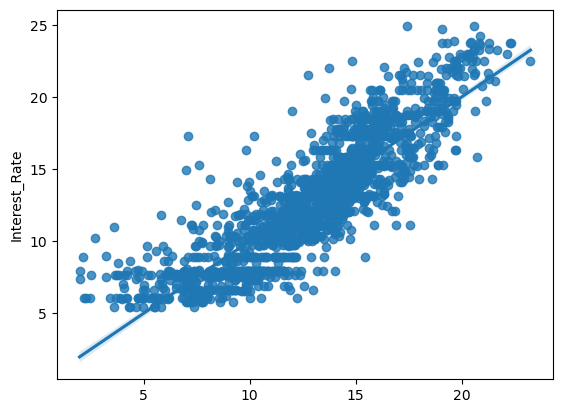

In [472]:
sns.regplot(x=train_predicted,y=train_target)
plt.show()

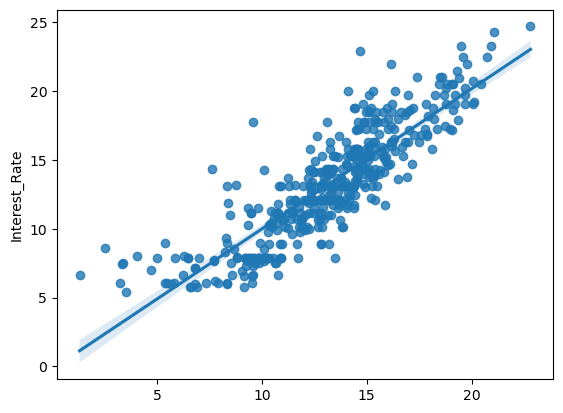

In [473]:
sns.regplot(x=val_predicted,y=val_target)
plt.show()

In [ ]:
from statsmodels.api import qqplot

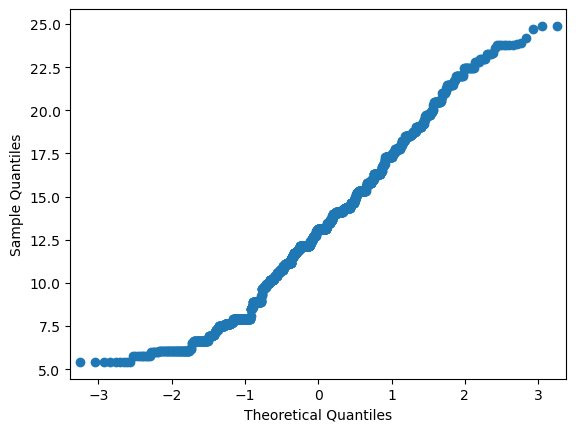

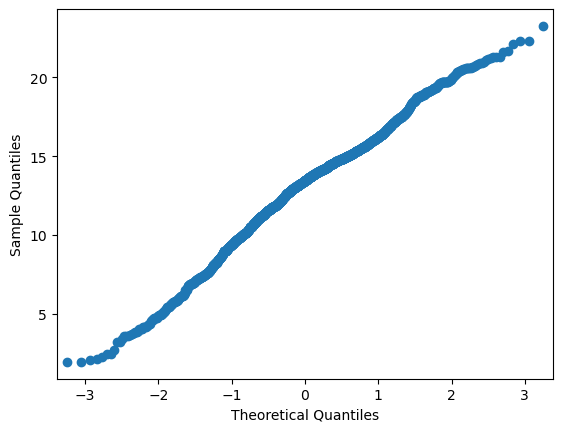

In [467]:
qqplot(train_target)
qqplot(train_predict)
plt.show()